# **# 1.**

2개의 입력 변수 x1과 x2를 특징값 스케일링(feature scaling) 방법에 의해 정규화하는 코드를 작성하시오

In [2]:
# 데이터 불러오기

# 구글 코랩 <-> 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/과제1.csv')

data.info()
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X1 kernel_area    210 non-null    float64
 1   X2 kernel_length  210 non-null    object 
 2   Wheat Varieties   210 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


,X1 kernel_area,X2 kernel_length,Wheat Varieties
0,15.26,5.22,Kama
1,14.88,"4,956",Kama
2,14.29,"4,825",Kama
3,13.84,"4,805",Kama
4,16.14,"5,175",Kama


In [3]:
import numpy as np
# 변수 지정
x1 = np.array(data['X1 kernel_area'], dtype = np.dtype('float64'))

x2 = np.array(data['X2 kernel_length'])
for i in range(len(x2)):
  x2[i] = float(x2[i].replace(',',''))   ### str -> float 변경할 때 : 천의 구분단위(,) 없애야함
x2 = np.array(x2, dtype = np.dtype('float64'))

y = np.array(data['Wheat Varieties'])
for i in range(len(y)):
  y[i] = str(y[i].replace(' ',''))   ### 문자열에서 ' ' 없애주기
y = np.array(y, dtype = np.dtype('O')) 

# 특징값 스케일링(feature scaling)
x1_scaled = (x1 - np.mean(x1)) / np.std(x1)
x2_scaled = (x2 - np.mean(x2)) / np.std(x2)

['Canadian' 'Kama' 'Rosa']


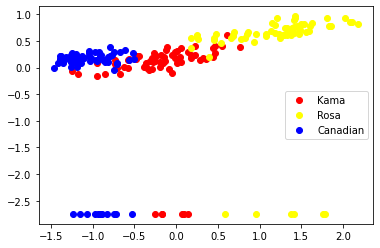

In [4]:
import matplotlib.pyplot as plt

# y값의 종류 출력
print(np.unique(y))

# y값의 종류에 따른 index 모으기
Kama_index = (y == 'Kama')
Rosa_index = (y == 'Rosa')
Canadian_index = (y == 'Canadian')

# 데이터의 scatter 그래프 보기
plt.scatter(x1_scaled[Kama_index],x2_scaled[Kama_index], c='red')
plt.scatter(x1_scaled[Rosa_index],x2_scaled[Rosa_index], c='yellow')
plt.scatter(x1_scaled[Canadian_index],x2_scaled[Canadian_index], c='blue')
plt.legend(['Kama','Rosa','Canadian'])
plt.show()